In [15]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [16]:
import pandas as pd
import os
import gzip
import numpy as np

In [17]:
file_path = '/content/drive/MyDrive/Colab Notebooks/SENG 474/Assignment2/Assignment2/DATA/fashion-mnist/data/fashion'

In [18]:
def load_mnist(path, kind='train'):


    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [49]:
def k_fold_cross_validation(X, y, model, k=5):
    # Shuffle the dataset and split it into k folds
    indices = np.arange(len(X))  # Create an array of indices from 0 to len(X) - 1
    np.random.shuffle(indices)  # Shuffle the indices randomly

    # Split the shuffled indices into k folds
    folds = np.array_split(indices, k)

    # List to store accuracy scores for each fold
    scores = []

    # Iterate through each fold for cross-validation
    for i in range(k):
        # Validation set is the i-th fold
        val_indices = folds[i]

        # Training set is the union of all other folds (excluding the i-th fold)
        train_indices = np.concatenate(folds[:i] + folds[i+1:])

        # Select training and validation data based on indices
        X_train, y_train = X[train_indices], y[train_indices]
        X_val, y_val = X[val_indices], y[val_indices]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculate accuracy for this fold and store it
        accuracy = svm.score(y_val, y_pred)
        scores.append(accuracy)

        print(f"Fold {i + 1}: Accuracy = {accuracy}")

    # Return mean and standard deviation of accuracy scores across all folds
    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)
    return mean_accuracy, std_accuracy



In [19]:
x_train, y_train = load_mnist(file_path, kind='train')
x_test, y_test = load_mnist(file_path, kind='t10k')

In [69]:
#what do I want to do?
#decide what k is -> ie how many sample sizes Ill have
def kfcv(x_train, y_train, model, k):
  score_list = []
  k = 5
  size = len(x_train)
  print(size)
  indices = np.array(range(size))
  print(indices)
  np.random.shuffle(indices)
  print(indices)

  fold = np.array_split(indices, k)
  print(fold)

  for i in range(k):
    fold_values = fold[i]

    train_indices = np.concatenate(fold[:i] + fold[i+1:])
    print(train_indices)
    validation_indices = fold[i]
    print(validation_indices)



  x_validation, y_validation = x_train[validation_indices], y_train[validation_indices]
  x_train, y_train = x_train[train_indices], y_train[train_indices]
  model.fit(x_train, y_train)
  score_list.append(1-model.score(x_validation, y_validation))

  return score_list

400
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 24

In [70]:
from sklearn.svm import SVC

# Initialize the linear SVM model
svm_model = SVC(kernel='linear', C=1)

# Perform k-fold cross-validation
print(kfcv(x_train, y_train, svm_model, 5))

400
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 24

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [22]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
   0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
 127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0   0   1
   1   1   0 200 232 232 233 229 223 223 215 213 16

In [23]:
#normalize
#might be worth having [-1, 1] and [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [24]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 

In [25]:
from sklearn.svm import SVC
#except here c is alpha???? no dont think so

#x_train = x_train[:400]
#y_train = y_train[:400]

x_validation = x_train[::2]
y_validation = y_train[::2]

In [26]:
print(x_train.shape)
print(y_train.shape)
#print(x_validation.shape)
#print(y_validation.shape)

(400, 784)
(400,)
(200, 784)
(200,)


rbf: exp(-gamma || x - xprime||^2)
where gamma must be greater than 0

In [27]:
svm = SVC(kernel='rbf', C=1.0)
svm.fit(x_train, y_train)

SVC()

In [28]:
import math

LOG SPACING IM PRETTY SURE

In [29]:
c_list = []
c_zero = 2
b = 2
for i in range(1,10):
  c_list.append(c_zero ** (b*i))

In [30]:
print(c_list)

[4, 16, 64, 256, 1024, 4096, 16384, 65536, 262144]


In [37]:
c_value_list = [0.0001, 0.001, 0.01,0.1,1,10,100,1000,10000]

c_value_list = c_list
#C0 > 0 and b > 1
#so c0 at 0.001
#then b starts at 2 and goes

c_loss_train_list = []
c_loss_test_list = []

for c in c_value_list:
  new_c = 1/(c)
  #new_c = math.log(c)

  svm = SVC(kernel='linear', C=new_c)
  svm.fit(x_train, y_train)
  c_loss_train_list.append(1-svm.score(x_train, y_train))
  c_loss_test_list.append(1-svm.score(x_validation, y_validation))

In [38]:
import matplotlib.pyplot as plt

In [39]:
print(c_loss_train_list)
print(c_loss_test_list)

[0.0, 0.020000000000000018, 0.12250000000000005, 0.22750000000000004, 0.4325, 0.8225, 0.8875, 0.8875, 0.8875]
[0.0, 0.010000000000000009, 0.125, 0.24, 0.4, 0.815, 0.87, 0.87, 0.87]


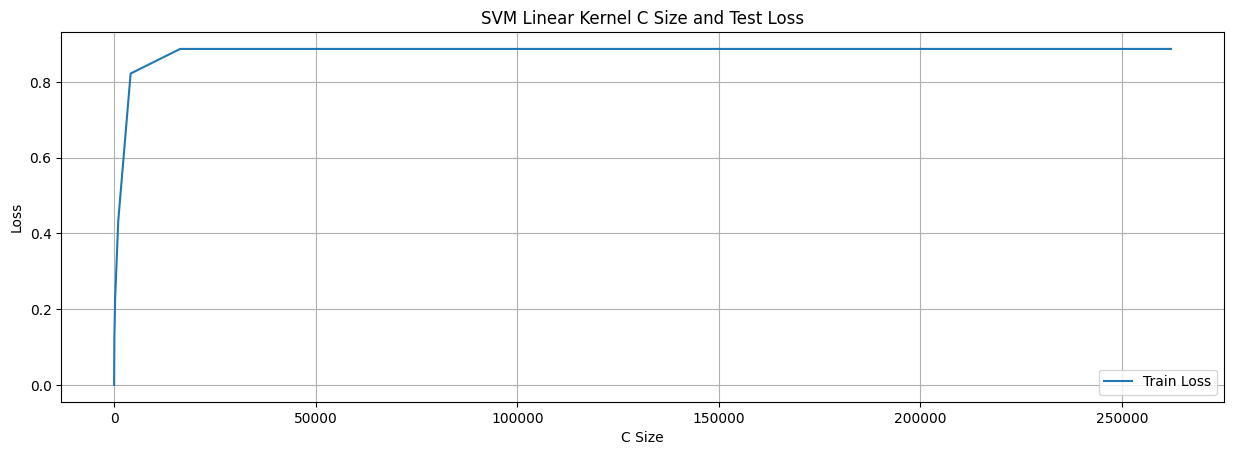

In [40]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("C Size")
plt.ylabel("Loss")
plt.title("SVM Linear Kernel C Size and Test Loss")

plt.plot(c_value_list, c_loss_train_list, label="Train Loss")

plt.legend()
plt.show()

stochastic gradient descent svm from sklearn uses kernels: C where C * sum(1 to n) of margin function (y<w,xi> + b)/||W|| ->kind of
But sklearn uses alpha as a kernel C = 1/(alpha * n)

In [35]:
print(svm.score(x_test, y_test))

0.1


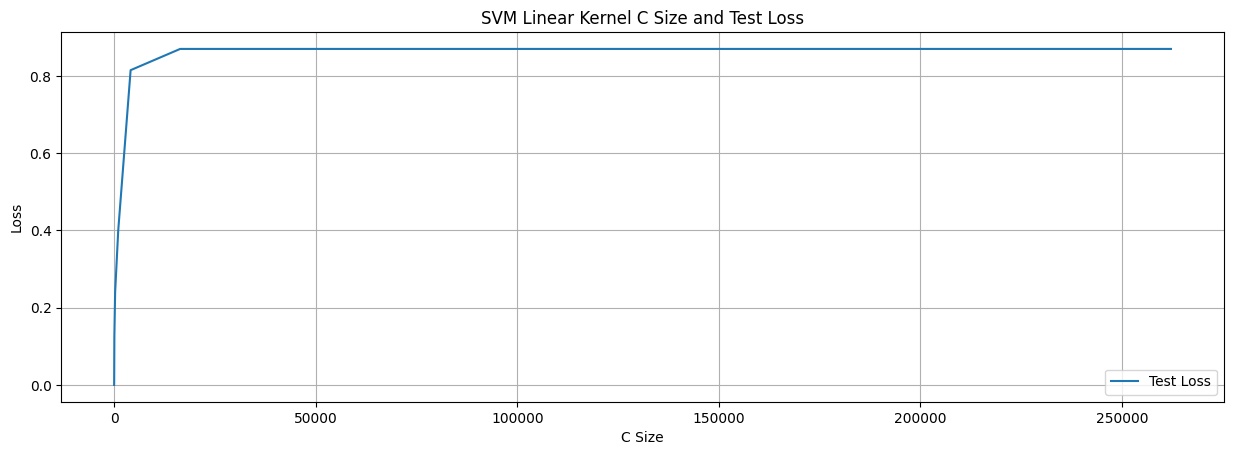

In [36]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("C Size")
plt.ylabel("Loss")
plt.title("SVM Linear Kernel C Size and Test Loss")

plt.plot(c_value_list, c_loss_test_list, label="Test Loss")

plt.legend()
plt.show()